In [2]:
!pip install tensorflow

In [3]:
!pip install opencv-python


In [4]:
!pip install matplotlib

In [5]:
import tensorflow as tf

In [6]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [7]:
tf.config.list_physical_devices('GPU')

[]

In [8]:
import cv2
from matplotlib import pyplot as plt

In [9]:
data_dir='data'

In [10]:
image_exts=['jpeg','jpg','bmp','png']

In [11]:
import os

In [12]:
img=cv2.imread(os.path.join('data','happy','Training_11204.jpg'))

In [13]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
        except  Exception as e:
            print('isssue with image{}'.format(image_path))
        


In [14]:
import numpy as np

In [15]:
data=tf.keras.utils.image_dataset_from_directory('data')#building the data pipeline by automatically reshaping resizing and batches  it

Found 12045 files belonging to 2 classes.


In [16]:
 data_iterator=data.as_numpy_iterator()#accessing the data pipeline

In [17]:
batch=data_iterator.next()#grabbing one batch 

In [18]:
batch[0].shape#images represented as numpy arrays

(32, 256, 256, 3)

In [19]:
#for pass 1 happy-0
batch[1]

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

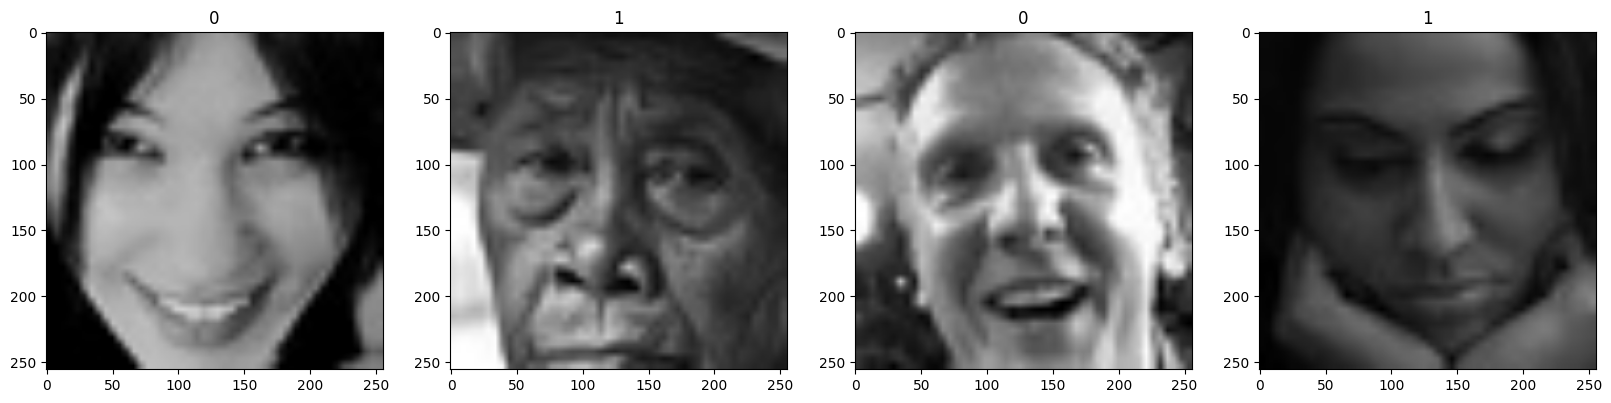

In [20]:
#checking if 0 is happy or sad
fig,ax =plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [21]:
data=data.map(lambda x,y:(x/255,y))#to scale the data from 0 to 1 instead of 0 to 255

In [22]:
data.as_numpy_iterator().next()[0].max()

1.0

In [23]:
len(data)

377

In [24]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)+1


In [25]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [26]:
len(test)

38

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout 

In [28]:
model=Sequential()


In [29]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [30]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [32]:
logdir='logs'

In [33]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
hist=model.fit(train,epochs=5,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/5
263/263 [==============================] - 190s 721ms/step - loss: 0.2758 - accuracy: 0.8811 - val_loss: 0.5521 - val_accuracy: 0.7508
Epoch 2/5
263/263 [==============================] - 191s 727ms/step - loss: 0.1803 - accuracy: 0.9313 - val_loss: 0.6704 - val_accuracy: 0.7471
Epoch 3/5
263/263 [==============================] - 192s 731ms/step - loss: 0.1193 - accuracy: 0.9577 - val_loss: 0.8398 - val_accuracy: 0.7627
Epoch 4/5
263/263 [==============================] - 213s 811ms/step - loss: 0.0655 - accuracy: 0.9788 - val_loss: 1.0020 - val_accuracy: 0.7603
Epoch 5/5
263/263 [==============================] - 193s 733ms/step - loss: 0.0459 - accuracy: 0.9853 - val_loss: 1.1672 - val_accuracy: 0.7504


In [36]:
hist.history

{'loss': [0.27581530809402466,
  0.1803254932165146,
  0.11933774501085281,
  0.06546258926391602,
  0.0458662286400795],
 'accuracy': [0.8810598850250244,
  0.9313212633132935,
  0.9576995968818665,
  0.9788498282432556,
  0.9852661490440369],
 'val_loss': [0.5520681738853455,
  0.670449435710907,
  0.8398448824882507,
  1.0020382404327393,
  1.1671627759933472],
 'val_accuracy': [0.7508223652839661,
  0.7471216917037964,
  0.7627466917037964,
  0.7602795958518982,
  0.7504112124443054]}

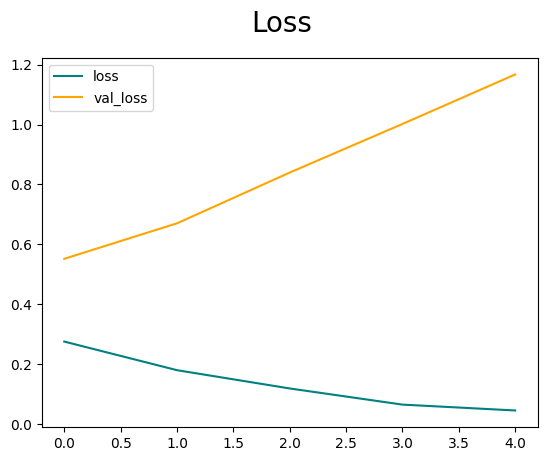

In [37]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

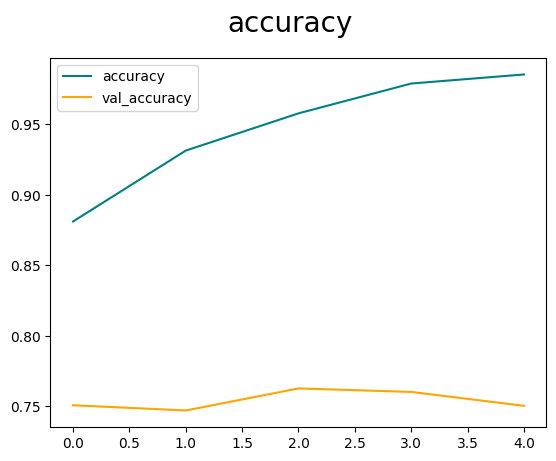

In [38]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [39]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [40]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [41]:
len(test)


38

In [42]:
for batch in test.as_numpy_iterator():
    X,y =batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)


1/1 [==============================] - 0s 123ms/step


In [43]:
print(f'Pre{pre.result().numpy()},re{re.result().numpy()},acc{acc.result().numpy()}')

Pre0.7319587469100952,re0.5748987793922424,acc0.7376775145530701


In [46]:
#test
import cv2


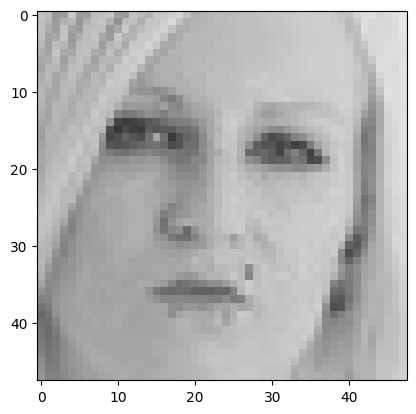

In [62]:
img=cv2.imread('sad3.jpg')
plt.imshow(img)
plt.show()

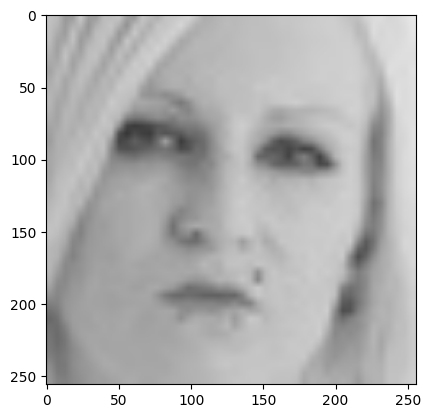

In [63]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [64]:
np.expand_dims(resize,0)

array([[[[194., 194., 194.],
         [194., 194., 194.],
         [194., 194., 194.],
         ...,
         [232., 232., 232.],
         [232., 232., 232.],
         [232., 232., 232.]],

        [[194., 194., 194.],
         [194., 194., 194.],
         [194., 194., 194.],
         ...,
         [232., 232., 232.],
         [232., 232., 232.],
         [232., 232., 232.]],

        [[194., 194., 194.],
         [194., 194., 194.],
         [194., 194., 194.],
         ...,
         [232., 232., 232.],
         [232., 232., 232.],
         [232., 232., 232.]],

        ...,

        [[150., 150., 150.],
         [150., 150., 150.],
         [150., 150., 150.],
         ...,
         [207., 207., 207.],
         [207., 207., 207.],
         [207., 207., 207.]],

        [[150., 150., 150.],
         [150., 150., 150.],
         [150., 150., 150.],
         ...,
         [207., 207., 207.],
         [207., 207., 207.],
         [207., 207., 207.]],

        [[150., 150., 150.],
       

In [65]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 43ms/step


In [66]:
yhat

array([[0.9420928]], dtype=float32)

In [67]:
if yhat>0.5:
    print("sad")
else:
    print("happy")

sad


In [68]:
#saving
from tensorflow.keras.models import load_model

In [61]:
model.save(os.path.join('models','happysadmodels.h5'))

D:\BNMIT\ml-project\deeplearn\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [99]:
new_model=load_model(os.path.join('models','happysadmodels.h5'))

In [100]:
new_model.predict

<bound method Model.predict of <keras.src.engine.sequential.Sequential object at 0x0000022FEA279FD0>>